In [2]:
import pandas as pd
import numpy as np


In [3]:
patient_info = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/patient_info.csv")
date = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/date.csv")

In [4]:
patient_info

,Participant_ID,Sex,Age,Smoking_status,BMI,Disease
0,1003300,Male,62,Previous,33.7597,2
1,1004025,Male,60,Previous,28.1173,1
2,1005551,Male,69,Previous,26.4159,2
3,1005594,Male,64,Previous,24.7550,1
4,1005624,Male,64,Previous,35.0773,2
...,...,...,...,...,...,...
2213,6009769,Male,48,Previous,39.3345,2
2214,6011693,Male,62,Previous,30.8813,2
2215,6015403,Female,60,Previous,34.7276,1
2216,6019982,Male,54,Never,25.3287,2


In [5]:
#The dataset has 19 missing values in the variable bmi and 3 missing values in variable smoking_status 
patient_info.isnull().sum()

Participant_ID     0
Sex                0
Age                0
Smoking_status     3
BMI               19
Disease            0
dtype: int64

1. The missing value from BMI can be replaced with the mean value of  its regarding gender



In [6]:
## Calculate the mean BMI for each gender
mean_bmi_by_gender = patient_info.groupby('Sex')['BMI'].mean()

In [7]:
# Replace missing BMI values with the mean BMI of their respective gender
patient_info['BMI'] = patient_info.apply(
    lambda row: mean_bmi_by_gender[row['Sex']] if pd.isna(row['BMI']) else row['BMI'],
    axis=1)

In [8]:
#Test 0 Missing BMI values
patient_info.isnull().sum()

Participant_ID    0
Sex               0
Age               0
Smoking_status    3
BMI               0
Disease           0
dtype: int64

2. Do the sanity check for all the columns in 2 files, and remove the sample which does not pass the sanity check

In [9]:
for column in patient_info:
    print(f"{column}: {patient_info[column].unique()}")

Participant_ID: [1003300 1004025 1005551 ... 6015403 6019982 6020094]
Sex: ['Male' 'Female']
Age: [62 60 69 64 66 58 63 40 67 61 65 44 55 52 57 56 70 43 59 68 45 46 54 48
 50 51 47 53 42 49 41  6]
Smoking_status: ['Previous' 'Never' 'Current' 'Prefer not to answer' nan]
BMI: [33.7597 28.1173 26.4159 ... 30.8813 34.7276 24.2972]
Disease: [2 1]


In [10]:
# Die Spalten Sex, Age und Disease sind in Ordnung. Weiter gehr es mit Prüfung von Participant_ID

In [11]:
#prüfen der Participant_ID

df_valid_ids = patient_info['Participant_ID'].astype(str).str.match(r'^\d{7}$')

alles_ok=df_valid_ids.all()

if alles_ok:
    
    print("Alle Patienten-IDs sind numerisch und bestehen aus 7 Ziffern.")
else:
    print("Es gibt Patienten-IDs, die nicht numerisch sind oder nicht aus 7 Ziffern bestehen.")
    


Alle Patienten-IDs sind numerisch und bestehen aus 7 Ziffern.


In [12]:
# alle Patientennummer haben 7 Ziffern und sind numerisch

In [13]:
#Prüfen der BMI:
print("Min value of BMI: ", patient_info.BMI.min())
print("Max value of BMI:", patient_info.BMI.max())

Min value of BMI:  -31.4133
Max value of BMI: 100.357


In [14]:
#Es gibt BMI Werte, die nicht zwischen 15 und 60 Liegen. Also werden diese löschen

In [15]:
patient_info_cleand = patient_info[(patient_info['BMI'] >= 15) & (patient_info['BMI'] <= 60)]



In [16]:
#Test der BMI
print("Min value of BMI: ", patient_info_cleand.BMI.min())
print("Max value of BMI:", patient_info_cleand.BMI.max())

Min value of BMI:  16.0037
Max value of BMI: 58.9468


In [17]:
# hier werden nur die zulässige Werte für Spalte "Smoking_status" definiert und im neuen Datensatz berücksichtigt.
allowed_values = ["Never", "Previous", "Current", "Prefer not to answer"]
patient_info_cleand = patient_info_cleand[patient_info_cleand['Smoking_status'].isin(allowed_values)]


In [18]:
#Test 0 Missing Values
patient_info_cleand.isnull().sum()

Participant_ID    0
Sex               0
Age               0
Smoking_status    0
BMI               0
Disease           0
dtype: int64

In [19]:
print (patient_info_cleand)

      Participant_ID     Sex  Age Smoking_status      BMI  Disease
0            1003300    Male   62       Previous  33.7597        2
1            1004025    Male   60       Previous  28.1173        1
2            1005551    Male   69       Previous  26.4159        2
3            1005594    Male   64       Previous  24.7550        1
4            1005624    Male   64       Previous  35.0773        2
...              ...     ...  ...            ...      ...      ...
2213         6009769    Male   48       Previous  39.3345        2
2214         6011693    Male   62       Previous  30.8813        2
2215         6015403  Female   60       Previous  34.7276        1
2216         6019982    Male   54          Never  25.3287        2
2217         6020094  Female   63          Never  24.2972        2

[2213 rows x 6 columns]


In [20]:
date = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/data_clean/data/date.csv")

In [21]:
date

,Participant_ID,VisitDate
0,1003300,1/7/2022
1,1003300,27/10/2021
2,1004025,19/05/2010
3,1005551,25/08/2021
4,1005551,29/06/2021
...,...,...
2886,6011693,27/10/2017
2887,6015403,14/08/2018
2888,6019982,19/01/2015
2889,6020094,13/06/2021


In [22]:
#prüfen der Participant_ID für datensatz "date"

df_valid_ids = date['Participant_ID'].astype(str).str.match(r'^\d{7}$')

alles_ok=df_valid_ids.all()

if alles_ok:
    
    print("Alle Patienten-IDs sind numerisch und bestehen aus 7 Ziffern.")
else:
    print("Es gibt Patienten-IDs, die nicht numerisch sind oder nicht aus 7 Ziffern bestehen.")
    


Alle Patienten-IDs sind numerisch und bestehen aus 7 Ziffern.


In [23]:
#alle Pazientennumern bestehen aus 7 Ziffern

3. Calculate the number of visits of each patient, if the VisitDate is missing, means they don't visit the hospital during that period

In [24]:
# die fehlenden VisitDates werden mit 0 ersetzt 
date['VisitDate'].fillna(0, inplace=True)

In [25]:
date.isnull().sum()

Participant_ID    0
VisitDate         0
dtype: int64

In [26]:
#Berechnung der Besuchsanzahl für jeden Patienten
visits = date.groupby('Participant_ID')['VisitDate'].count().reset_index()
visits.rename(columns={'VisitDate': 'Number of Visits'}, inplace=True)

print (visits)


      Participant_ID  Number of Visits
0            1003300                 2
1            1004025                 1
2            1005551                 2
3            1005594                 1
4            1005624                 2
...              ...               ...
2211         6009769                 1
2212         6011693                 4
2213         6015403                 1
2214         6019982                 1
2215         6020094                 2

[2216 rows x 2 columns]


4. Merge two files with columns: Patient_ID, Sex, Age, BMI, Smoking_status, Number_of_visit, Disease

In [27]:
df3 = pd.merge(patient_info_cleand, visits, on = 'Participant_ID' )
print (df3)

      Participant_ID     Sex  Age Smoking_status      BMI  Disease  \
0            1003300    Male   62       Previous  33.7597        2   
1            1004025    Male   60       Previous  28.1173        1   
2            1005551    Male   69       Previous  26.4159        2   
3            1005594    Male   64       Previous  24.7550        1   
4            1005624    Male   64       Previous  35.0773        2   
...              ...     ...  ...            ...      ...      ...   
2208         6009769    Male   48       Previous  39.3345        2   
2209         6011693    Male   62       Previous  30.8813        2   
2210         6015403  Female   60       Previous  34.7276        1   
2211         6019982    Male   54          Never  25.3287        2   
2212         6020094  Female   63          Never  24.2972        2   

      Number of Visits  
0                    2  
1                    1  
2                    2  
3                    1  
4                    2  
...      

# Task 2 : Statistics (you don't need to check the model assumption in this exercise)

## 1. Is the BMI different between the healthy and control group? make the box/violin chart ( factor 1 means disease, 2 means healthy)


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

H0: es gibt keine Unterschied im BMI zwischen der beiden Gruppen
H1: es gibt Unterschide im BMI zwischen der beiden Gruppen

In [30]:
#Dafür filtere ich die die beiden Gruppen aus den gesammten Datensatz und schpeichere die BMIs für die jeweilige Gruppe in separate Tabelle
group_disease_data = df3.loc[df3["Disease"]==1,["BMI"]]

group_healthy_data = df3.loc[df3["Disease"]==2,["BMI"]]


Berechnung der Mittelwerte und Standartabweichungen für jede Gruppe

In [31]:
group_disease_data.mean()

BMI    29.041336
dtype: float64

In [32]:
group_disease_data.std()

BMI    5.118812
dtype: float64

In [33]:
group_healthy_data.mean()

BMI    29.089782
dtype: float64

In [34]:
group_healthy_data.std()

BMI    5.213808
dtype: float64

Und Visualisierung der Daten

<AxesSubplot:xlabel='Disease', ylabel='BMI'>

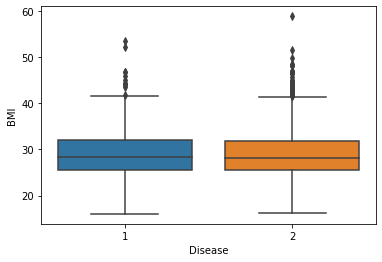

In [35]:
sns.boxplot(x='Disease', y='BMI', data=df3)

<AxesSubplot:xlabel='Disease', ylabel='BMI'>

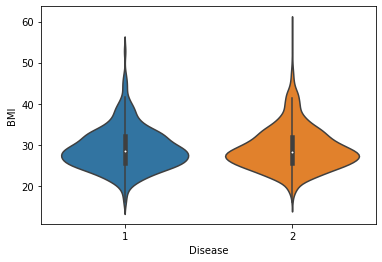

In [36]:
sns.violinplot(x="Disease", y='BMI', data=df3)

Es ist keine sichtbare Differenz erkennbar. Es kann ein T-Test durchgeführt werden um zu überprüfen ob der Mittelwert zweier Gruppen statistisch signifikant unterschiedlich ist. Es wird ein p-wert ermittelt, welcher die Wahrscheinlichkeit angibt, dass ein Unterschied im BMI zwischen den Gruppen allein aufgrund des Zufalls auftritt oder nicht. Wenn der p-Wert kleiner ist als das gewählte Signifikanzniveau (alpha=typischerweise kleiner als 0,05), wird davon ausgegangen, dass es einen statistisch signifikanten Unterschied gibt. 
Basierend auf den vorliegenden Daten und der durchgeführten statistischen Analyse wurden keine ausreichenden Beweise gefunden, um die Nullhypothese zu verwerfen. Daher wird H0 bestätigt.

In [37]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(group_disease_data['BMI'], group_healthy_data['BMI'], equal_var=False)

alpha = 0.05


if p_value < alpha:
    
    
    print("Es gibt einen statistisch signifikanten Unterschied im BMI zwischen den Gruppen.")
    
else:
    
    print("Es gibt keinen statistisch signifikanten Unterschied im BMI zwischen den Gruppen.")
    
    print ("p-Wert:", p_value)


Es gibt keinen statistisch signifikanten Unterschied im BMI zwischen den Gruppen.
p-Wert: 0.8468311334245384


## 2. Is the proportion of Smoke status different between the healthy and control group?

H0: Es gibt keinen Unterschied im Raucherstatus in beiden gruppen
H1: Es gibt Unterschied im Raucherstatus in beiden gruppen

In [38]:
#zuerst werden die notwendige Daten aus dem gesamten Datensatz rausgefiltert
smoking = df3[["Disease","Smoking_status"]]

smoking

,Disease,Smoking_status
0,2,Previous
1,1,Previous
2,2,Previous
3,1,Previous
4,2,Previous
...,...,...
2208,2,Previous
2209,2,Previous
2210,1,Previous
2211,2,Never


In [39]:
# Um bessere Vorstellung von den Daten zu bekommen, wird eine Kreuztabelle erstellt
cross_table = pd.crosstab(smoking['Smoking_status'],smoking['Disease'],margins=True )

cross_table

Disease,1,2,All
Smoking_status,,,
Current,92,258,350
Never,214,636,850
Prefer not to answer,5,4,9
Previous,254,750,1004
All,565,1648,2213


In [40]:
#es wird ein Chi-Quadrat Test durchgeführt
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(cross_table)
print("Chi-Quadrat-Statistik:", chi2)
print("p-Wert:", p_value)

Chi-Quadrat-Statistik: 4.456815606566221
p-Wert: 0.8137378632997907


Die Chi-Quadrat-Statistik von 4.4568 und der p-Wert von 0.2161 deuten darauf hin, dass es keine ausreichenden Hinweise dafür gibt, dass die beobachteten Häufigkeiten in den verschiedenen Kategorien statistisch signifikant voneinander abweichen.

In [41]:
group_disease_data_s = df3.loc[df3["Disease"]==1,["Smoking_status"]]

group_healthy_data_s = df3.loc[df3["Disease"]==2,["Smoking_status"]]


## 3. Is the smoke status related to the number of Hospital visits regardless of the disease? (ignore the "Prefer not to answer")

H0: es gibt keine Zusammenhang zwischen Raucherstatus und der Anzahl der Krankenhausbesuche 
H1: es gibt einen Zusammenhang zwischen Raucherstatus und der Anzahl der Krankenhausbesuche 

In [80]:
values = ['Current', 'Never', 'Previous']
smoking_visits = df3[df3['Smoking_status'].isin(values)][["Number of Visits", "Smoking_status"]]

smoking_visits

,Number of Visits,Smoking_status
0,2,Previous
1,1,Previous
2,2,Previous
3,1,Previous
4,2,Previous
...,...,...
2208,1,Previous
2209,4,Previous
2210,1,Previous
2211,1,Never


Text(0, 0.5, 'Number of Visits')

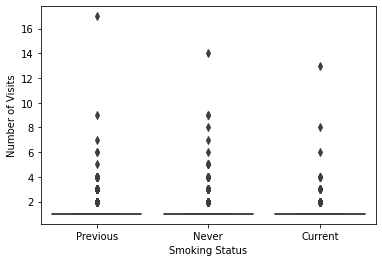

In [81]:
sns.boxplot(x=smoking_visits['Smoking_status'], y=smoking_visits['Number of Visits'])

plt.xlabel('Smoking Status')
plt.ylabel('Number of Visits')

In [83]:
from scipy import stats
group_current = smoking_visits[smoking_visits['Smoking_status'] == 'Current']['Number of Visits']
group_never = smoking_visits[smoking_visits['Smoking_status'] == 'Never']['Number of Visits']
group_previous = smoking_visits[smoking_visits['Smoking_status'] == 'Previous']['Number of Visits']

# ANOVA-Test
f_value, p_value = stats.f_oneway(group_current, group_never, group_previous)

# Ausgabe der Ergebnisse
print("F-Wert:", f_value)
print("p-Wert:", p_value)

F-Wert: 0.43325317191327717
p-Wert: 0.6484516004443337


Der niedriger F-Wert ist ein Hinweis dafür, dass die Varianzunterschiede zwischen den Gruppen gering sind und die Gruppen ähnliche Mittelwerte aufweisen.
Der p-Wert von 0.6484516004443337 bedeutet , dass es keine ausreichenden statistischen Beweise für signifikanten Unterschied in der Anzahl der Krankenhausbesuche zwischen den Raucherstatusgruppen "Current", "Never" und "Previous" gibt.
Basierend auf den vorliegenden Daten und der durchgeführten statistischen Analyse wurden keine ausreichenden Beweise gefunden, um die Nullhypothese zu verwerfen. Daher wird H0 bestätigt.

## 4. Is the number of visits higher in the Disease group than in the Healthy group?

In [51]:
disease_visit = df3.loc[df3["Disease"]==1,['Number of Visits']]

healthy_visit = df3.loc[df3["Disease"]==2,['Number of Visits']]

Berechnung der Mittelwerte und Standartabweichungen für jede Gruppe

In [52]:
disease_visit.mean()


Number of Visits    1.306195
dtype: float64

In [53]:
disease_visit.std()

Number of Visits    0.79004
dtype: float64

In [54]:
healthy_visit.mean()

Number of Visits    1.304005
dtype: float64

In [55]:
healthy_visit.std()

Number of Visits    0.939161
dtype: float64

Beide Mittelwerte in Verbindung mit der Standartabweichung deuten auf eine geringe Steuertung der Daten hin, die Mittelwerte der beiden Gruppen untrscheiden sich nur wenig von einander

<AxesSubplot:xlabel='Disease', ylabel='Number of Visits'>

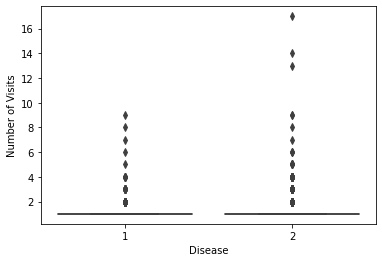

In [56]:
sns.boxplot(x='Disease', y= "Number of Visits", data=df3)

Visuel ist fast kein Unterschied zu erkennen, bei der Gruppe der "gesunden" gibt es einige wenige Fälle, die über 10 Krankenhausbesuche hatten. Die Standartabweichung ist bei dieser Gruppe ist auch etwas größer als bei der Gruppe der Kranken.

In [57]:
t_statistic, p_value = ttest_ind(disease_visit['Number of Visits'], healthy_visit['Number of Visits'], equal_var=False)

alpha = 0.05


if p_value < alpha:
    
    
    print("Es gibt einen statistisch signifikanten Unterschied im der Anzahl der Krankenhausbesuche zwischen den Gruppen.")
    
else:
    
    print("Es gibt keinen statistisch signifikanten Unterschied im der Anzahl im Krankenhausbesuche zwischen den Gruppen.")
    
    print ("p-Wert:", p_value)


Es gibt keinen statistisch signifikanten Unterschied im der Anzahl im Krankenhausbesuche zwischen den Gruppen.
p-Wert: 0.9568844735087191


p-Wert kleiner ist größer gewählte Signifikanzniveau (alpha= 0,05), wird davon ausgegangen, dass es keinen statistisch signifikanten Unterschied zwischen beiden gruppen gibt. 
Basierend auf den vorliegenden Daten und der durchgeführten statistischen Analyse wurden keine ausreichenden Beweise gefunden, um die Nullhypothese zu verwerfen. Daher wird H0 bestätigt.

## 5. Do Male has a higher current smoke percentage compared to Female? 

H0: es gibt keine Zusammenhang zwischen aktuelem Raucherstatus und dem Geschlecht
H1: es gibt einen Zusammenhang zwischen aktuelem Raucherstatus und und dem Geschlecht

In [74]:
#herausfiltern nur aktuelle raucher
curent_smoke=df3[df3["Smoking_status"] == 'Current']

In [79]:
## Um bessere Vorstellung von den Daten zu bekommen, wird eine Kreuztabelle erstellt
smoking_gender = pd.crosstab(curent_smoke['Sex'], curent_smoke['Smoking_status'])
smoking_gender

Smoking_status,Current
Sex,
Female,106
Male,244


In [77]:
#es wird ein Chi-Quadrat Test durchgeführt
chi2, p_value, _, _ = chi2_contingency(smoking_gender)
print("Chi-Quadrat-Statistik:", chi2)
print("p-Wert:", p_value)

Chi-Quadrat-Statistik: 0.0
p-Wert: 1.0


Eine Chi-Quadrat-Statistik von 0.0 und ein p-Wert von 1.0 deuten darauf hin, dass es keinen Zusammenhang zwischen dem Geschlecht und dem aktuellen Raucherstatus gibt. Basierend auf den vorliegenden Daten und der durchgeführten statistischen Analyse wurden keine ausreichenden Beweise gefunden, um die Nullhypothese zu verwerfen. Daher wird H0 bestätigt